In [1]:
import sys
import pathlib
import numpy as np
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import warnings

warnings.filterwarnings("ignore")
sys.path.insert(0, "../utils/")
from data_loader import load_data, load_train_test_data

In [2]:
# data path
data_directory = "../0.data-download/data/"

In [3]:
# load the training data
train_data = load_train_test_data(
    data_directory, train_or_test="train", load_gene_stats=False
)

In [4]:
# set a unique dataframe that can be appended from
training_df_age = train_data

# group by age and create new dataframes that can be appended to
groups = training_df_age.groupby("age_and_sex")
adult_effect_df = pd.DataFrame()
ped_effect_df = pd.DataFrame()
for name, training_df_age in groups:

    # append rows that contain Adult samples (male or female) to the new adult effect dataframe
    if name == "Adult_Male" or name == "Adult_Female" or name == "Adult_nan":
        adult_effect_df = adult_effect_df._append(training_df_age)
        adult_effect_df = adult_effect_df.reset_index(drop=True)

    # append rows that contain Pediatric samples (male ore female) to the new pediatric dataframe
    else:
        ped_effect_df = ped_effect_df._append(training_df_age)
        ped_effect_df = ped_effect_df.reset_index(drop=True)

In [5]:
# set a unique dataframe that can be appended from
training_df_sex = train_data

# group by sex and create new dataframes to be appended to
groups_sex = training_df_sex.groupby("age_and_sex")
male_effect_df = pd.DataFrame()
female_effect_df = pd.DataFrame()
for name, training_df_sex in groups_sex:

    # append rows that contain Male samples (Adult or Pediatric) to the new male effect dataframe and filter out samples that contain no gender info
    if (
        name == "Adult_Male"
        or name == "Pediatric_Male"
        and name != "Pediatric_nan"
        and name != "Adult_nan"
    ):
        male_effect_df = male_effect_df._append(training_df_sex)
        male_effect_df = male_effect_df.reset_index(drop=True)

    # append rows that contain Female samples (Adult or Pediatric) to the new female effect dataframe and filter out samples that contain no gender info
    elif (
        name == "Adult_Female"
        or name == "Pediatric_Female"
        and name != "Pediatric_nan"
        and name != "Adult_nan"
    ):
        female_effect_df = female_effect_df._append(training_df_sex)
        female_effect_df = female_effect_df.reset_index(drop=True)

In [6]:
print(adult_effect_df.shape)
adult_effect_df.head(3)

(569, 17109)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-000569,-0.236197,0.037577,-0.056611,0.180552,-0.073225,-0.338064,-0.002834,0.075166,-0.169582,...,-0.611104,-0.187078,0.189025,-0.156478,-0.004594,-0.360712,-0.164859,-0.490189,-0.089747,Adult_Female
1,ACH-000963,-0.211905,-0.103702,0.031513,0.133329,0.032130,0.139724,-0.013841,-0.111958,-0.109355,...,-0.474096,0.225580,0.255745,0.039617,-0.077673,0.144135,-0.048750,-0.074417,-0.395382,Adult_Female
2,ACH-002233,-0.093672,-0.366180,-0.109357,0.020036,-0.023716,-0.105628,0.030641,0.202607,-0.025883,...,-0.790797,0.240297,0.220411,-0.046740,0.156938,-0.203547,0.050072,-0.234468,0.328525,Adult_Female


In [7]:
print(ped_effect_df.shape)
ped_effect_df.head(3)

(101, 17109)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-000884,-0.081498,-0.171470,-0.090280,0.103028,0.012566,-0.211951,0.023782,-0.060868,0.006372,...,-0.782037,0.105815,-0.065808,-0.000630,0.115507,-0.044015,-0.098097,-0.090774,-0.278785,Adult_Unknown
1,ACH-000260,-0.019484,-0.078167,-0.041717,0.046208,-0.229482,-0.177081,0.000570,-0.066302,0.008426,...,-0.564366,0.082260,0.009843,-0.151433,-0.058123,-0.180082,-0.032600,-0.005677,-0.329996,Pediatric_Female
2,ACH-001433,-0.226684,-0.137095,-0.054353,0.002903,-0.150727,-0.214441,0.034888,0.062019,-0.027670,...,-0.142556,0.000673,0.125734,-0.093026,-0.103080,-0.155535,-0.011729,-0.088325,-0.166790,Pediatric_Female


In [8]:
print(male_effect_df.shape)
male_effect_df.head(3)

(378, 17109)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-001578,-0.251242,0.045095,0.255223,-0.007852,-0.112987,0.167671,-0.048606,-0.164626,0.170724,...,-0.447906,-0.069794,0.019615,-0.327797,-0.124387,-0.166438,0.388557,-0.176953,-0.386672,Adult_Male
1,ACH-000950,-0.080727,-0.063888,0.097277,-0.109687,-0.154164,-0.035636,-0.036866,-0.022074,-0.078160,...,-0.989853,0.239012,0.320294,-0.087854,-0.029575,-0.075462,-0.067295,0.023003,-0.200667,Adult_Male
2,ACH-002533,-0.126145,-0.148752,-0.016674,-0.019519,-0.033035,-0.090514,-0.028561,0.013604,-0.016799,...,-0.791356,-0.050286,0.053460,-0.019028,-0.174584,-0.456611,-0.090991,-0.239409,-0.075689,Adult_Male


In [9]:
print(female_effect_df.shape)
female_effect_df.head(3)

(285, 17109)


,ModelID,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009),age_and_sex
0,ACH-000569,-0.236197,0.037577,-0.056611,0.180552,-0.073225,-0.338064,-0.002834,0.075166,-0.169582,...,-0.611104,-0.187078,0.189025,-0.156478,-0.004594,-0.360712,-0.164859,-0.490189,-0.089747,Adult_Female
1,ACH-000963,-0.211905,-0.103702,0.031513,0.133329,0.032130,0.139724,-0.013841,-0.111958,-0.109355,...,-0.474096,0.225580,0.255745,0.039617,-0.077673,0.144135,-0.048750,-0.074417,-0.395382,Adult_Female
2,ACH-002233,-0.093672,-0.366180,-0.109357,0.020036,-0.023716,-0.105628,0.030641,0.202607,-0.025883,...,-0.790797,0.240297,0.220411,-0.046740,0.156938,-0.203547,0.050072,-0.234468,0.328525,Adult_Female


In [10]:
# drop the string values from all dataframes
adult_effect_df_float = adult_effect_df.drop(
    columns=["ModelID", "age_and_sex"]
)
ped_effect_df_float = ped_effect_df.drop(columns=["ModelID", "age_and_sex"])

male_effect_df_float = male_effect_df.drop(columns=["ModelID", "age_and_sex"])
female_effect_df_float = female_effect_df.drop(
    columns=["ModelID", "age_and_sex"]
)

effect_df = train_data.drop(columns="age_and_sex")
effect_df = effect_df.set_index("ModelID")

In [11]:
# t_test comparing gene dependencies in adult vs pediatric samples
t_test = ttest_ind(adult_effect_df_float, ped_effect_df_float)
t_test = pd.DataFrame(t_test).T
t_test.columns = ["t_stat", "p_value"]
print(t_test.shape)
t_test.head(3)

(17107, 2)


,t_stat,p_value
0,0.918580,0.358647
1,-0.518725,0.604125
2,-0.609475,0.542417


In [12]:
# t_test comparing gene dependencies in male vs female samples
t_test_sex = ttest_ind(male_effect_df_float, female_effect_df_float)
t_test_sex = pd.DataFrame(t_test_sex).T
t_test_sex.columns = ["t_stat", "p_value"]
print(t_test_sex.shape)
t_test_sex.head(3)

(17107, 2)


,t_stat,p_value
0,-0.977160,0.328847
1,0.581028,0.561420
2,1.134843,0.256852


In [13]:
print(effect_df.shape)
effect_df.head(3)

(670, 17107)


,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),AADAC (13),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
ModelID,,,,,,,,,,,,,,,,,,,,,
ACH-001578,-0.251242,0.045095,0.255223,-0.007852,-0.112987,0.167671,-0.048606,-0.164626,0.170724,0.271658,...,-0.589333,-0.447906,-0.069794,0.019615,-0.327797,-0.124387,-0.166438,0.388557,-0.176953,-0.386672
ACH-000569,-0.236197,0.037577,-0.056611,0.180552,-0.073225,-0.338064,-0.002834,0.075166,-0.169582,0.165976,...,-0.393262,-0.611104,-0.187078,0.189025,-0.156478,-0.004594,-0.360712,-0.164859,-0.490189,-0.089747
ACH-000963,-0.211905,-0.103702,0.031513,0.133329,0.032130,0.139724,-0.013841,-0.111958,-0.109355,0.134623,...,-0.332369,-0.474096,0.225580,0.255745,0.039617,-0.077673,0.144135,-0.048750,-0.074417,-0.395382


In [14]:
# calculate variance of each gene then send the results plus the gene info into a new dataframe
variance = effect_df.var()
variance_list = variance.tolist()
column_names = ["variance"]
variance_df = pd.DataFrame(variance, columns=column_names)
variance_df = variance_df.sort_index(ascending=True).reset_index()
variance_df = variance_df.rename(columns={"index": "gene_ID"})
print(variance_df.shape)
variance_df.head(3)

(17107, 2)


,gene_ID,variance
0,A1BG (1),0.010137
1,A1CF (29974),0.011406
2,A2M (2),0.009605


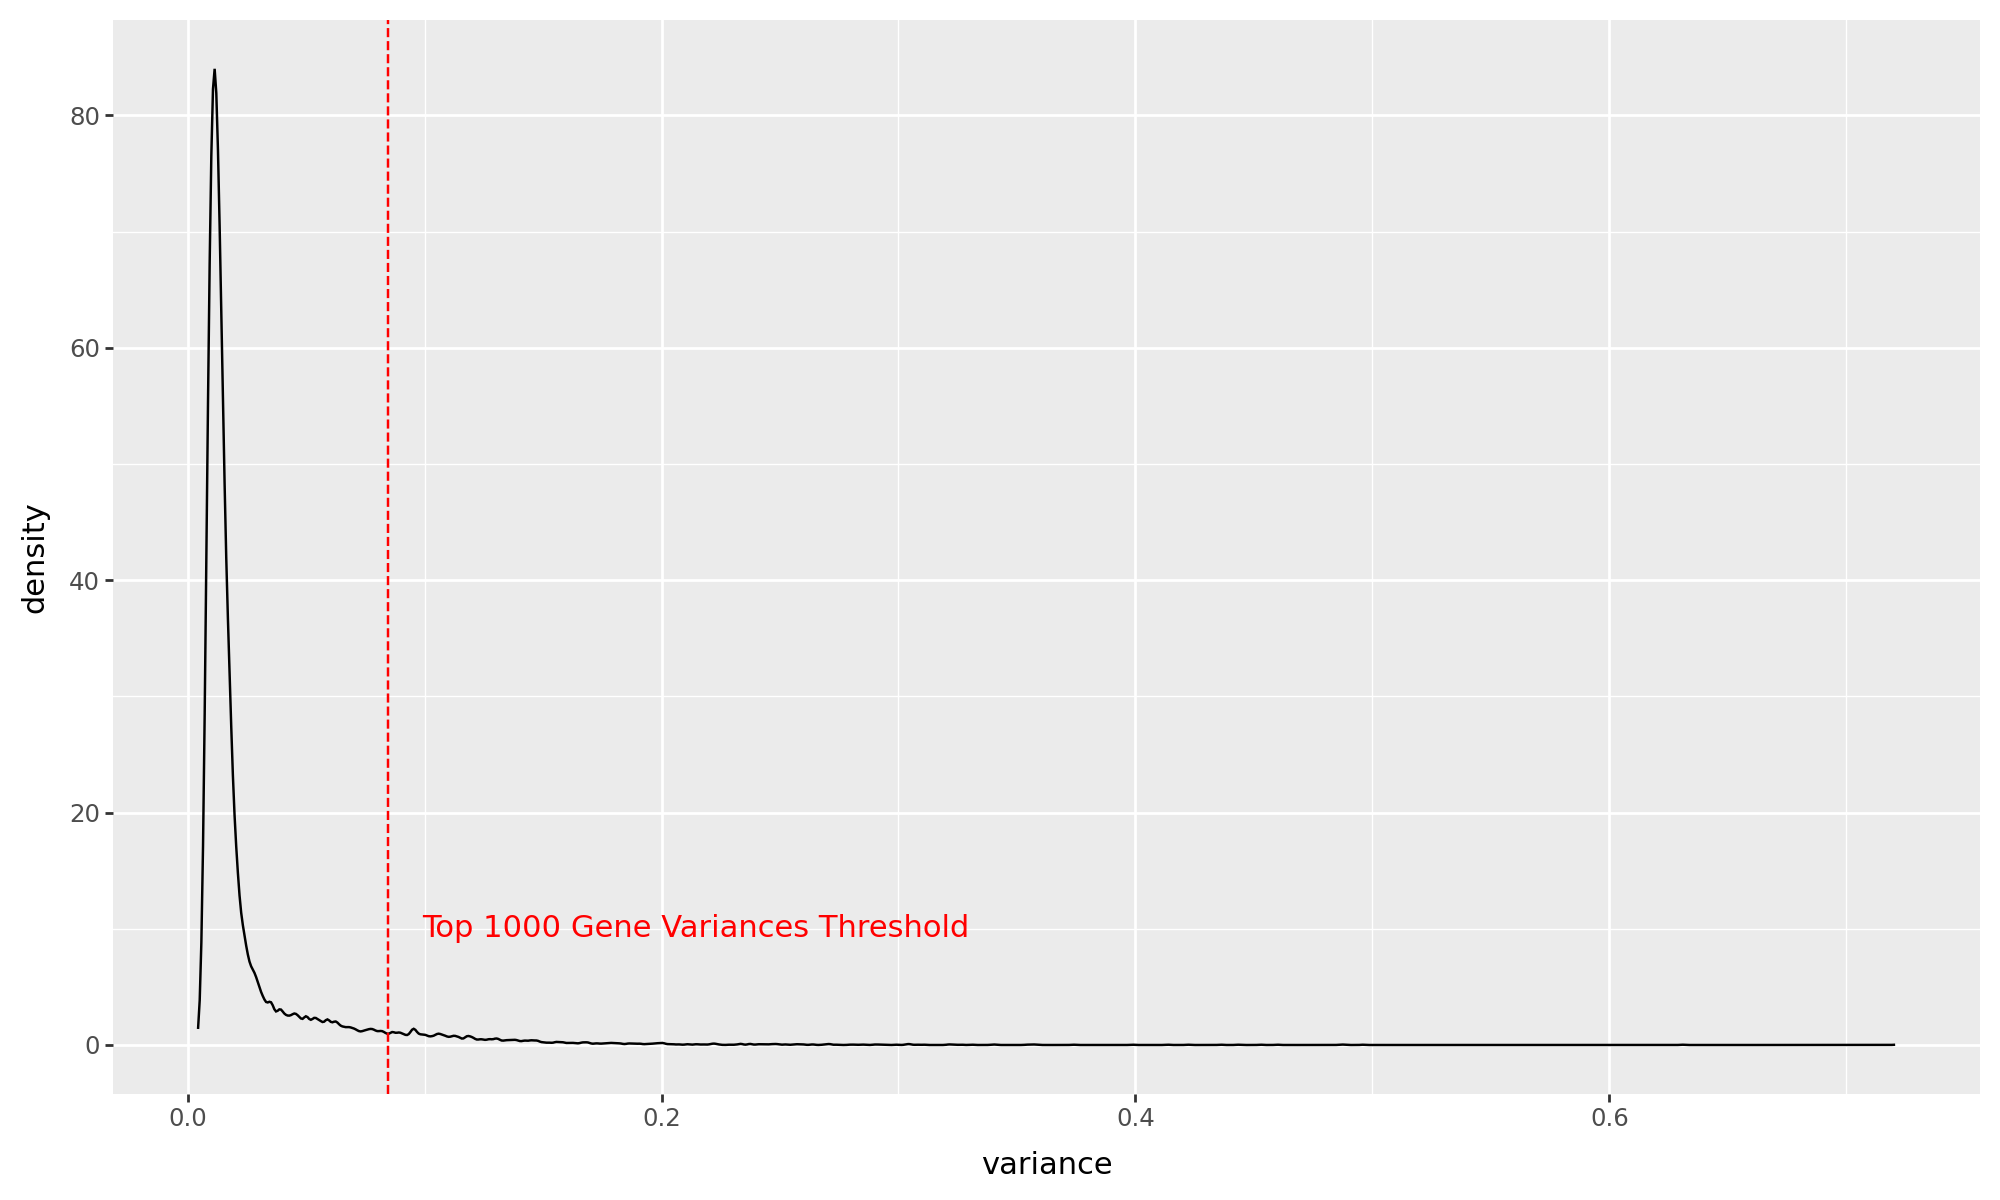

In [15]:
# finding the smallest gene variation out of the 1000 largest gene variations to set the top 1000 gene variances threshold
n = variance_df["variance"].nlargest(1000)
variance_threshold = n.astype(float).min()

# plotting variance density chart and marking the 1000 largest gene variation cutoff
variance_density_plot = (
    p9.ggplot(variance_df, p9.aes(x="variance"))
    + p9.geom_density()
    + p9.geom_vline(xintercept=variance_threshold, linetype="dashed", color="red")
    + p9.annotate(geom="text", x=variance_threshold + 0.13, y = 10, label="Top 1000 Gene Variances Threshold", color="red") 
    + p9.theme(figure_size=(10, 6))
)

# save the figure
density_path = pathlib.Path("./figures/variance_density_plot.png")
variance_density_plot.save(density_path)
variance_density_plot

In [16]:
# first create new dataframe containing gene info as well as both adult-pediatric and male-female t-test results and variance results
df = variance_df.assign(
    ttest_A_vs_P=t_test.t_stat.astype(float),
    ttest_M_vs_F=t_test_sex.t_stat.astype(float),
)

# and save the new dataframe as a .parquet
testing_df_output = pathlib.Path(
    "../0.data-download/data/genes_variances_and_t-tests_df.parquet"
)
df.to_parquet(testing_df_output, index=False)
print(df.shape)
df.head(3)

(17107, 4)


,gene_ID,variance,ttest_A_vs_P,ttest_M_vs_F
0,A1BG (1),0.010137,0.918580,-0.977160
1,A1CF (29974),0.011406,-0.518725,0.581028
2,A2M (2),0.009605,-0.609475,1.134843


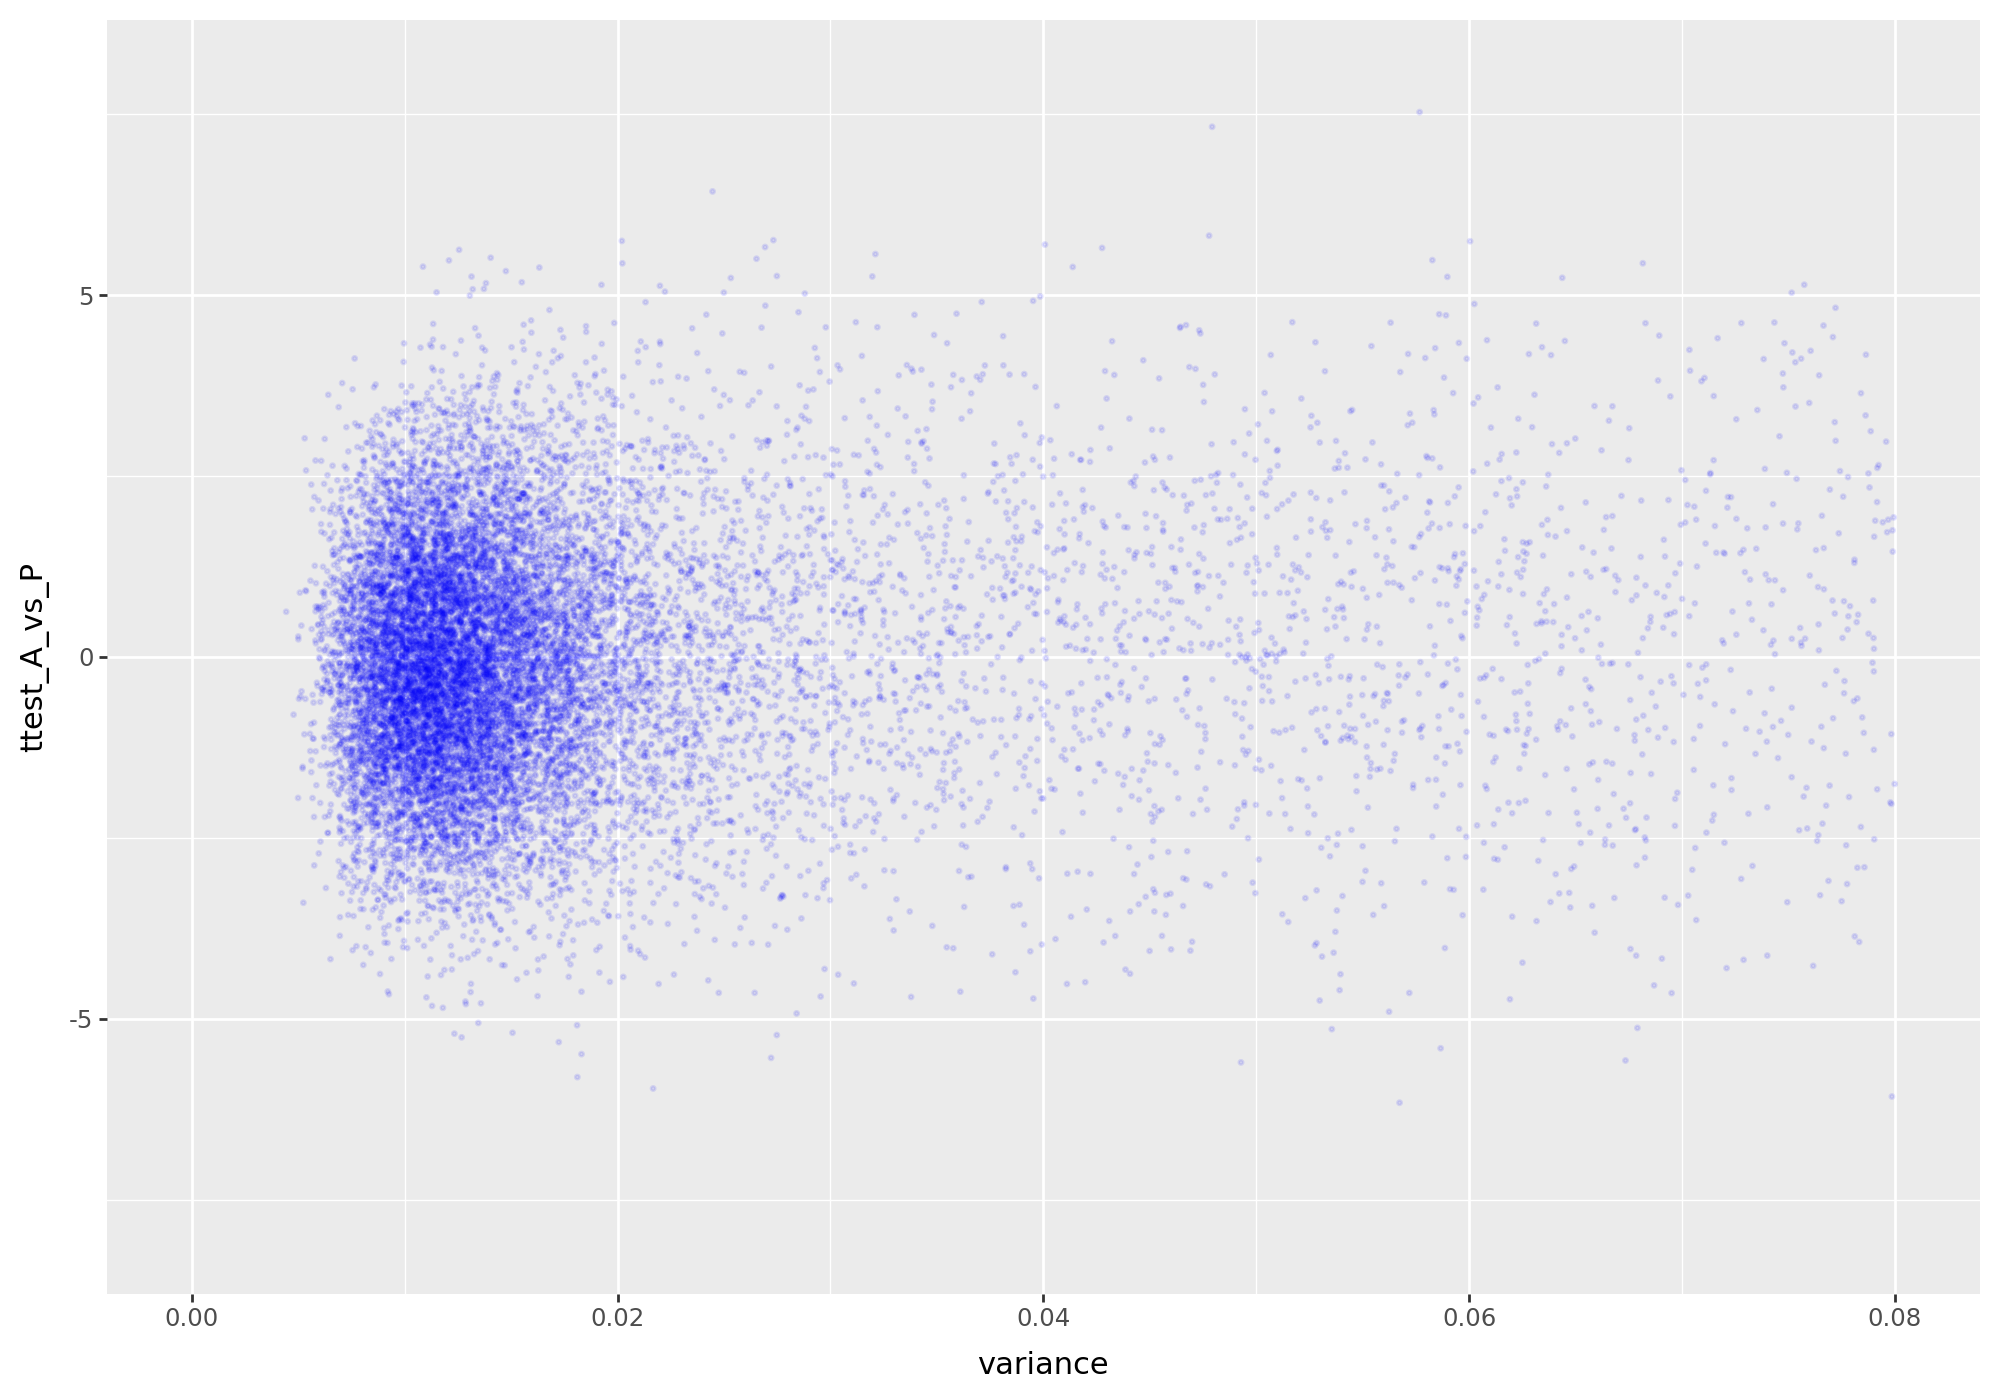

In [17]:
# plot adult-pediatric ttest versus variance
A_vs_P_by_variance_plot = (
    p9.ggplot(data=df, mapping=p9.aes(x="variance", y="ttest_A_vs_P"))
    + p9.geom_point(size=0.4, alpha=0.1, color="blue")
    + p9.theme(figure_size=(10, 7))
    + p9.xlim(0.00, 0.08)
    + p9.ylim(-8,8)
)

# save the figure
adult_vs_pediatric_path = pathlib.Path(
    "./figures/adult-pediatric_ttest_vs_variance.png"
)
A_vs_P_by_variance_plot.save(adult_vs_pediatric_path)
A_vs_P_by_variance_plot

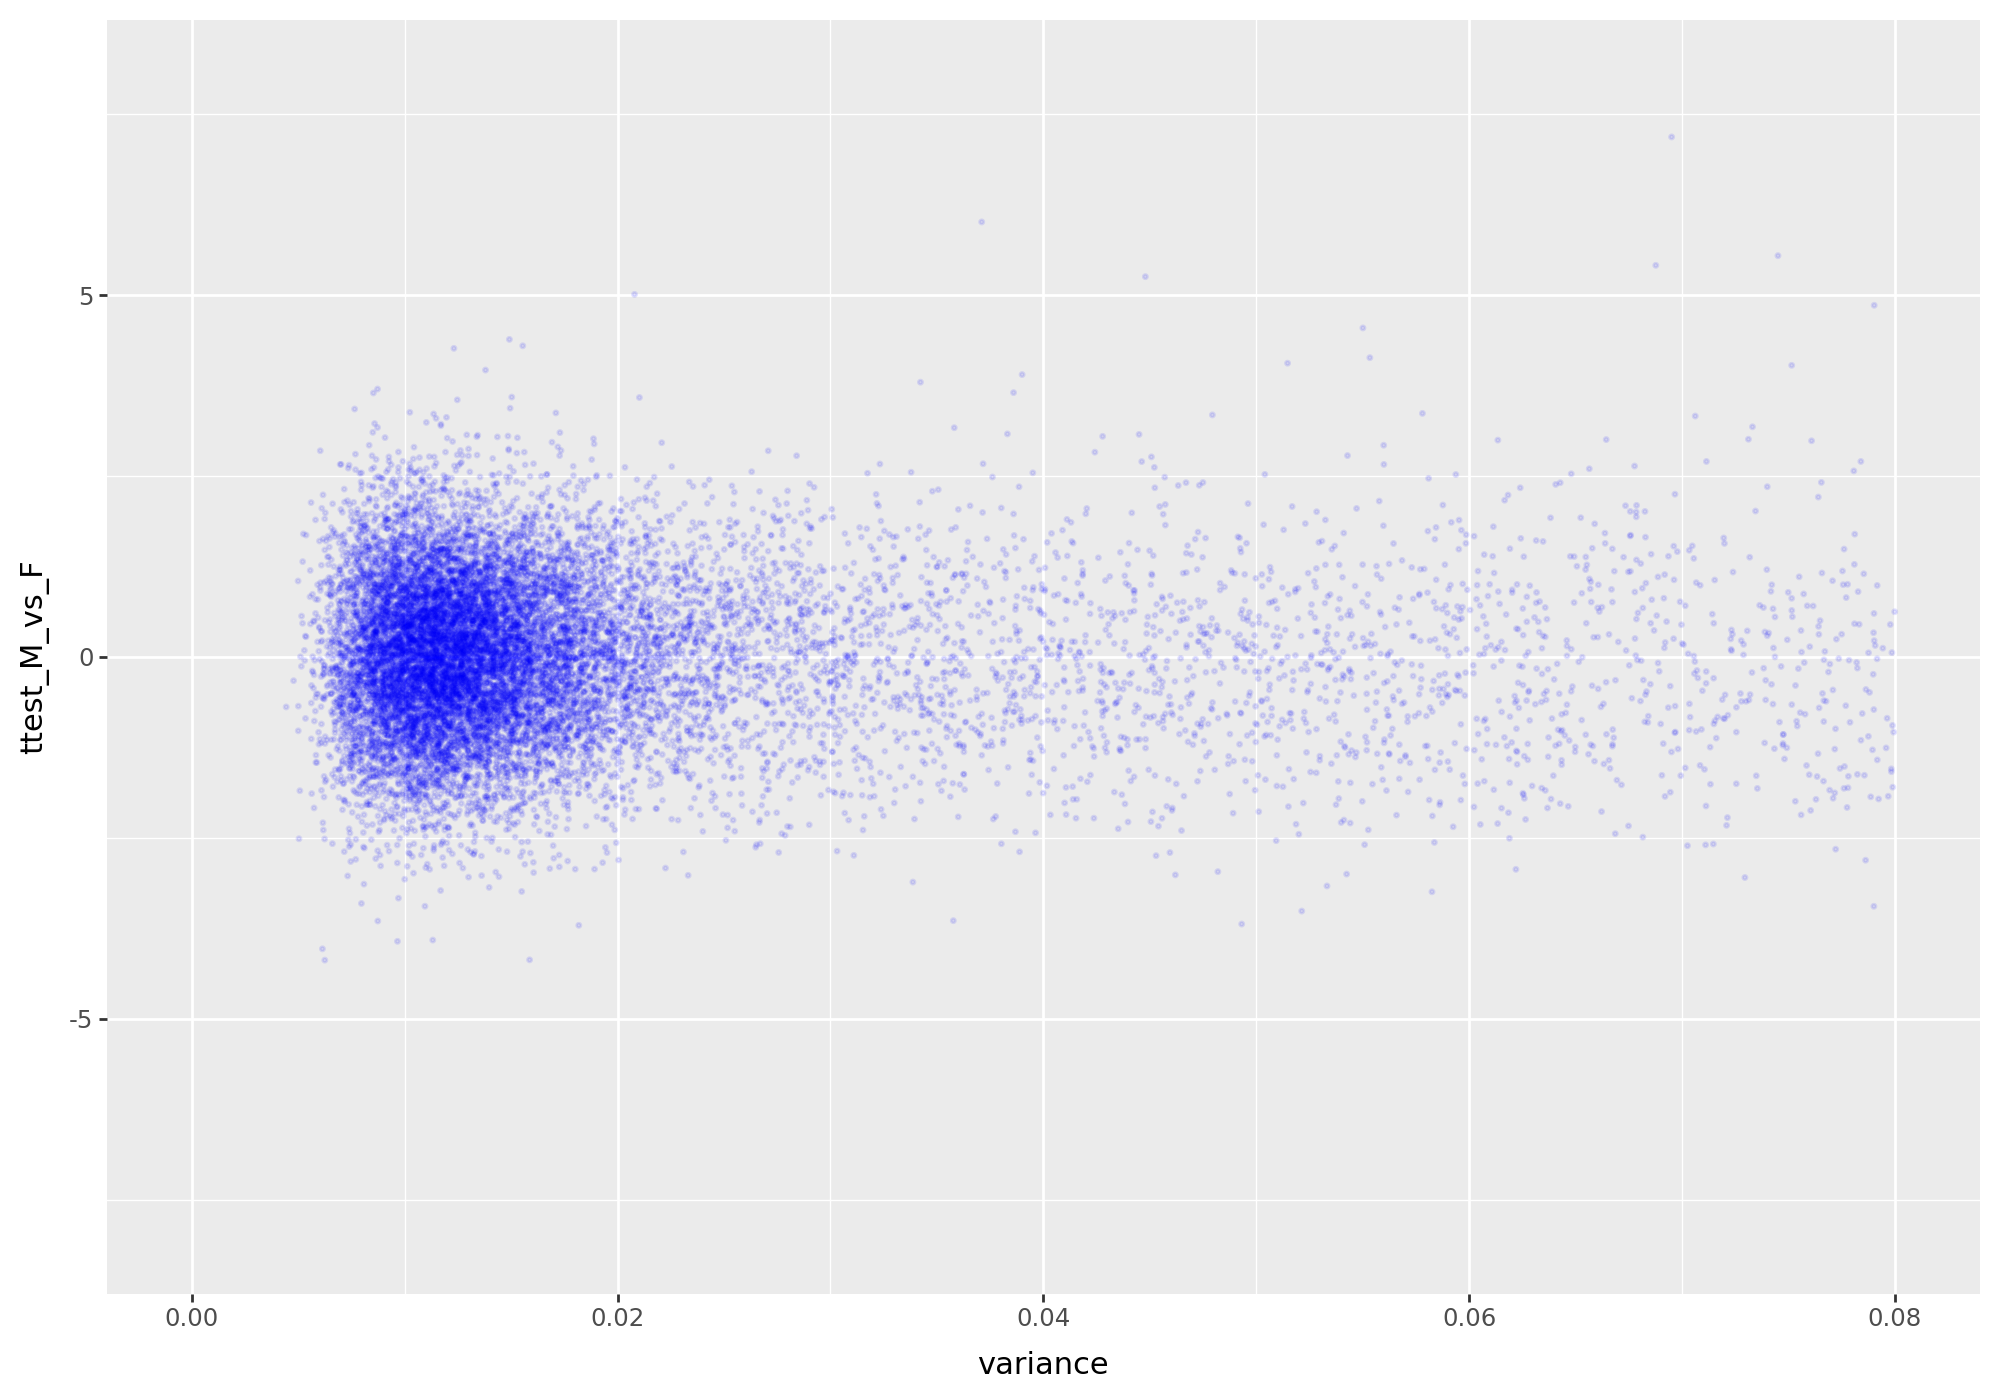

In [18]:
# plot male-female ttest versus gene variance
M_vs_F_by_variance_plot = (
    p9.ggplot(data=df, mapping=p9.aes(x="variance", y="ttest_M_vs_F"))
    + p9.geom_point(size=0.4, alpha=0.1, color="blue")
    + p9.theme(figure_size=(10, 7))
    + p9.xlim(0.00, 0.08)
    + p9.ylim(-8,8)
)

# save the figure
male_vs_female_path = pathlib.Path("./figures/male-female_ttest_vs_variance.png")
M_vs_F_by_variance_plot.save(male_vs_female_path)
M_vs_F_by_variance_plot